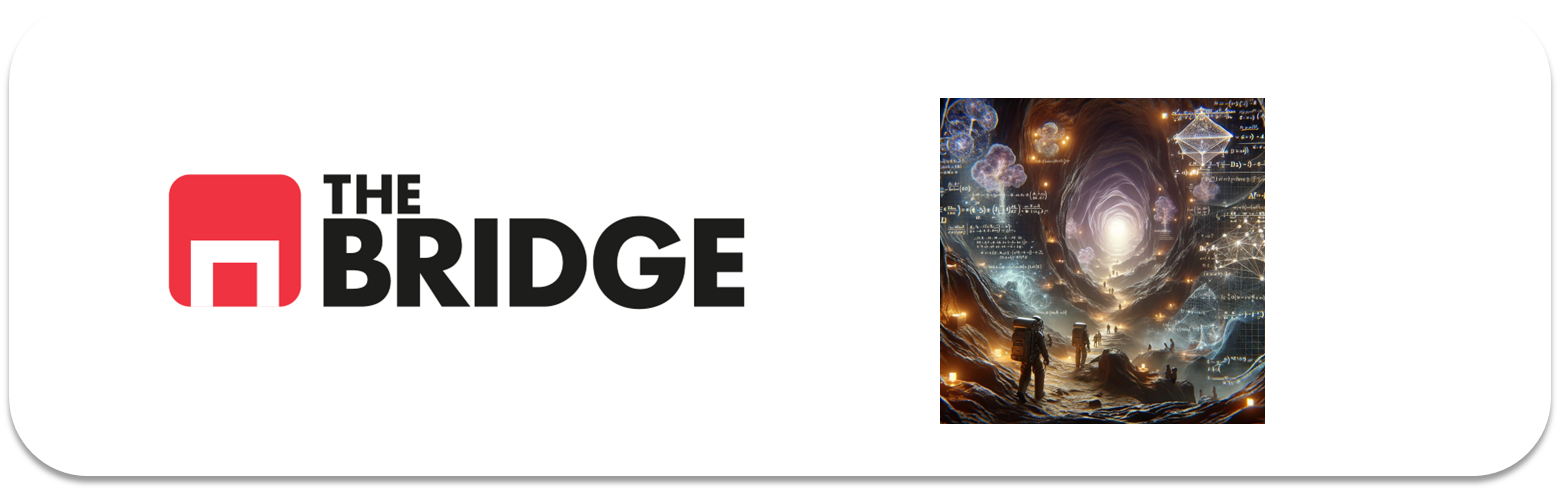

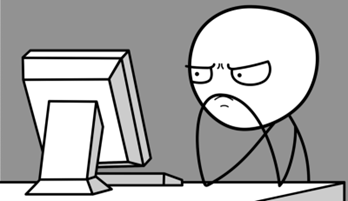

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [2]:
df =  pd.read_csv("./data/Autos_data.txt")

In [3]:
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
with open("./data/Autos_data.txt") as f:
    datos = f.read()

lista_datos = []

for linea in datos.split("\n"):
    #datos = {clave.lower():dato for clave,dato in zip(column_names,linea.split"\t")[0].(split() + [linea.split("\t")[-1].replace('"','')])}
    datos = {clave.lower():dato for clave,dato in zip(column_names,linea.split())}
    lista_datos.append(datos)

df = pd.DataFrame(lista_datos)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1
394,44.0,4,97.00,52.00,2130.,24.6,82,2
395,32.0,4,135.0,84.00,2295.,11.6,82,1
396,28.0,4,120.0,79.00,2625.,18.6,82,1


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [5]:
print(df.head())

    mpg cylinders displacement horsepower weight acceleration model year  \
0  18.0         8        307.0      130.0  3504.         12.0         70   
1  15.0         8        350.0      165.0  3693.         11.5         70   
2  18.0         8        318.0      150.0  3436.         11.0         70   
3  16.0         8        304.0      150.0  3433.         12.0         70   
4  17.0         8        302.0      140.0  3449.         10.5         70   

  origin  
0      1  
1      1  
2      1  
3      1  
4      1  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           398 non-null    object
 1   cylinders     398 non-null    object
 2   displacement  398 non-null    object
 3   horsepower    398 non-null    object
 4   weight        398 non-null    object
 5   acceleration  398 non-null    object
 6   model year    398 non-null    object
 7   origin        398 non-null    object
dtypes: object(8)
memory usage: 25.0+ KB
None


In [7]:
print(df.describe())

         mpg cylinders displacement horsepower weight acceleration model year  \
count    398       398          398        398    398          398        398   
unique   129         5           82         94    351           96         13   
top     13.0         4        97.00      150.0  1985.         14.5         73   
freq      20       204           21         22      4           23         40   

       origin  
count     398  
unique      3  
top         1  
freq      249  


In [8]:
# Convertir columnas numéricas
for col in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Revisar nulos
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [10]:
# Eliminar filas con nulos (principalmente en 'horsepower')
df = df.dropna()

In [11]:
# Confirmar tipos finales
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [12]:
# Lista de features categóricas para más adelante
categorical_features = ['origin', 'model year']
print("Features categóricas identificadas:", categorical_features)

Features categóricas identificadas: ['origin', 'model year']


### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [13]:
# Asegurarse de trabajar sobre una copia segura
df = df.copy()

# Mapear origin a literal
origin_map = {1: 'USA', 2: 'Europe', 3: 'Japan'}
df['origin'] = df['origin'].map(origin_map)

# One-hot encoding
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

# Mostrar resultado
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin_Europe  origin_Japan  origin_USA  
0          70          False         False        True  
1          70          False         False        True  
2          70          False         False        True  
3          70          False         False        True  
4          70          False         False        True  


In [14]:
# Convertir booleanos a enteros
df[['origin_Europe', 'origin_Japan', 'origin_USA']] = df[['origin_Europe', 'origin_Japan', 'origin_USA']].astype(int)
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin_Europe  origin_Japan  origin_USA  
0          70              0             0           1  
1          70              0             0           1  
2          70              0             0           1  
3          70              0             0           1  
4          70              0             0           1  


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [15]:
# Definir target
target = 'mpg'

# Separar X (features) e y (target)
X = df.drop(columns=[target])
y = df[target]

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Combinar X e y para obtener datasets completos de train y test
train_dataset = pd.concat([X_train, y_train], axis=1)
test_dataset = pd.concat([X_test, y_test], axis=1)

# Mostrar resultados
print("Train dataset shape:", train_dataset.shape)
print("Test dataset shape:", test_dataset.shape)


Train dataset shape: (313, 10)
Test dataset shape: (79, 10)


### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

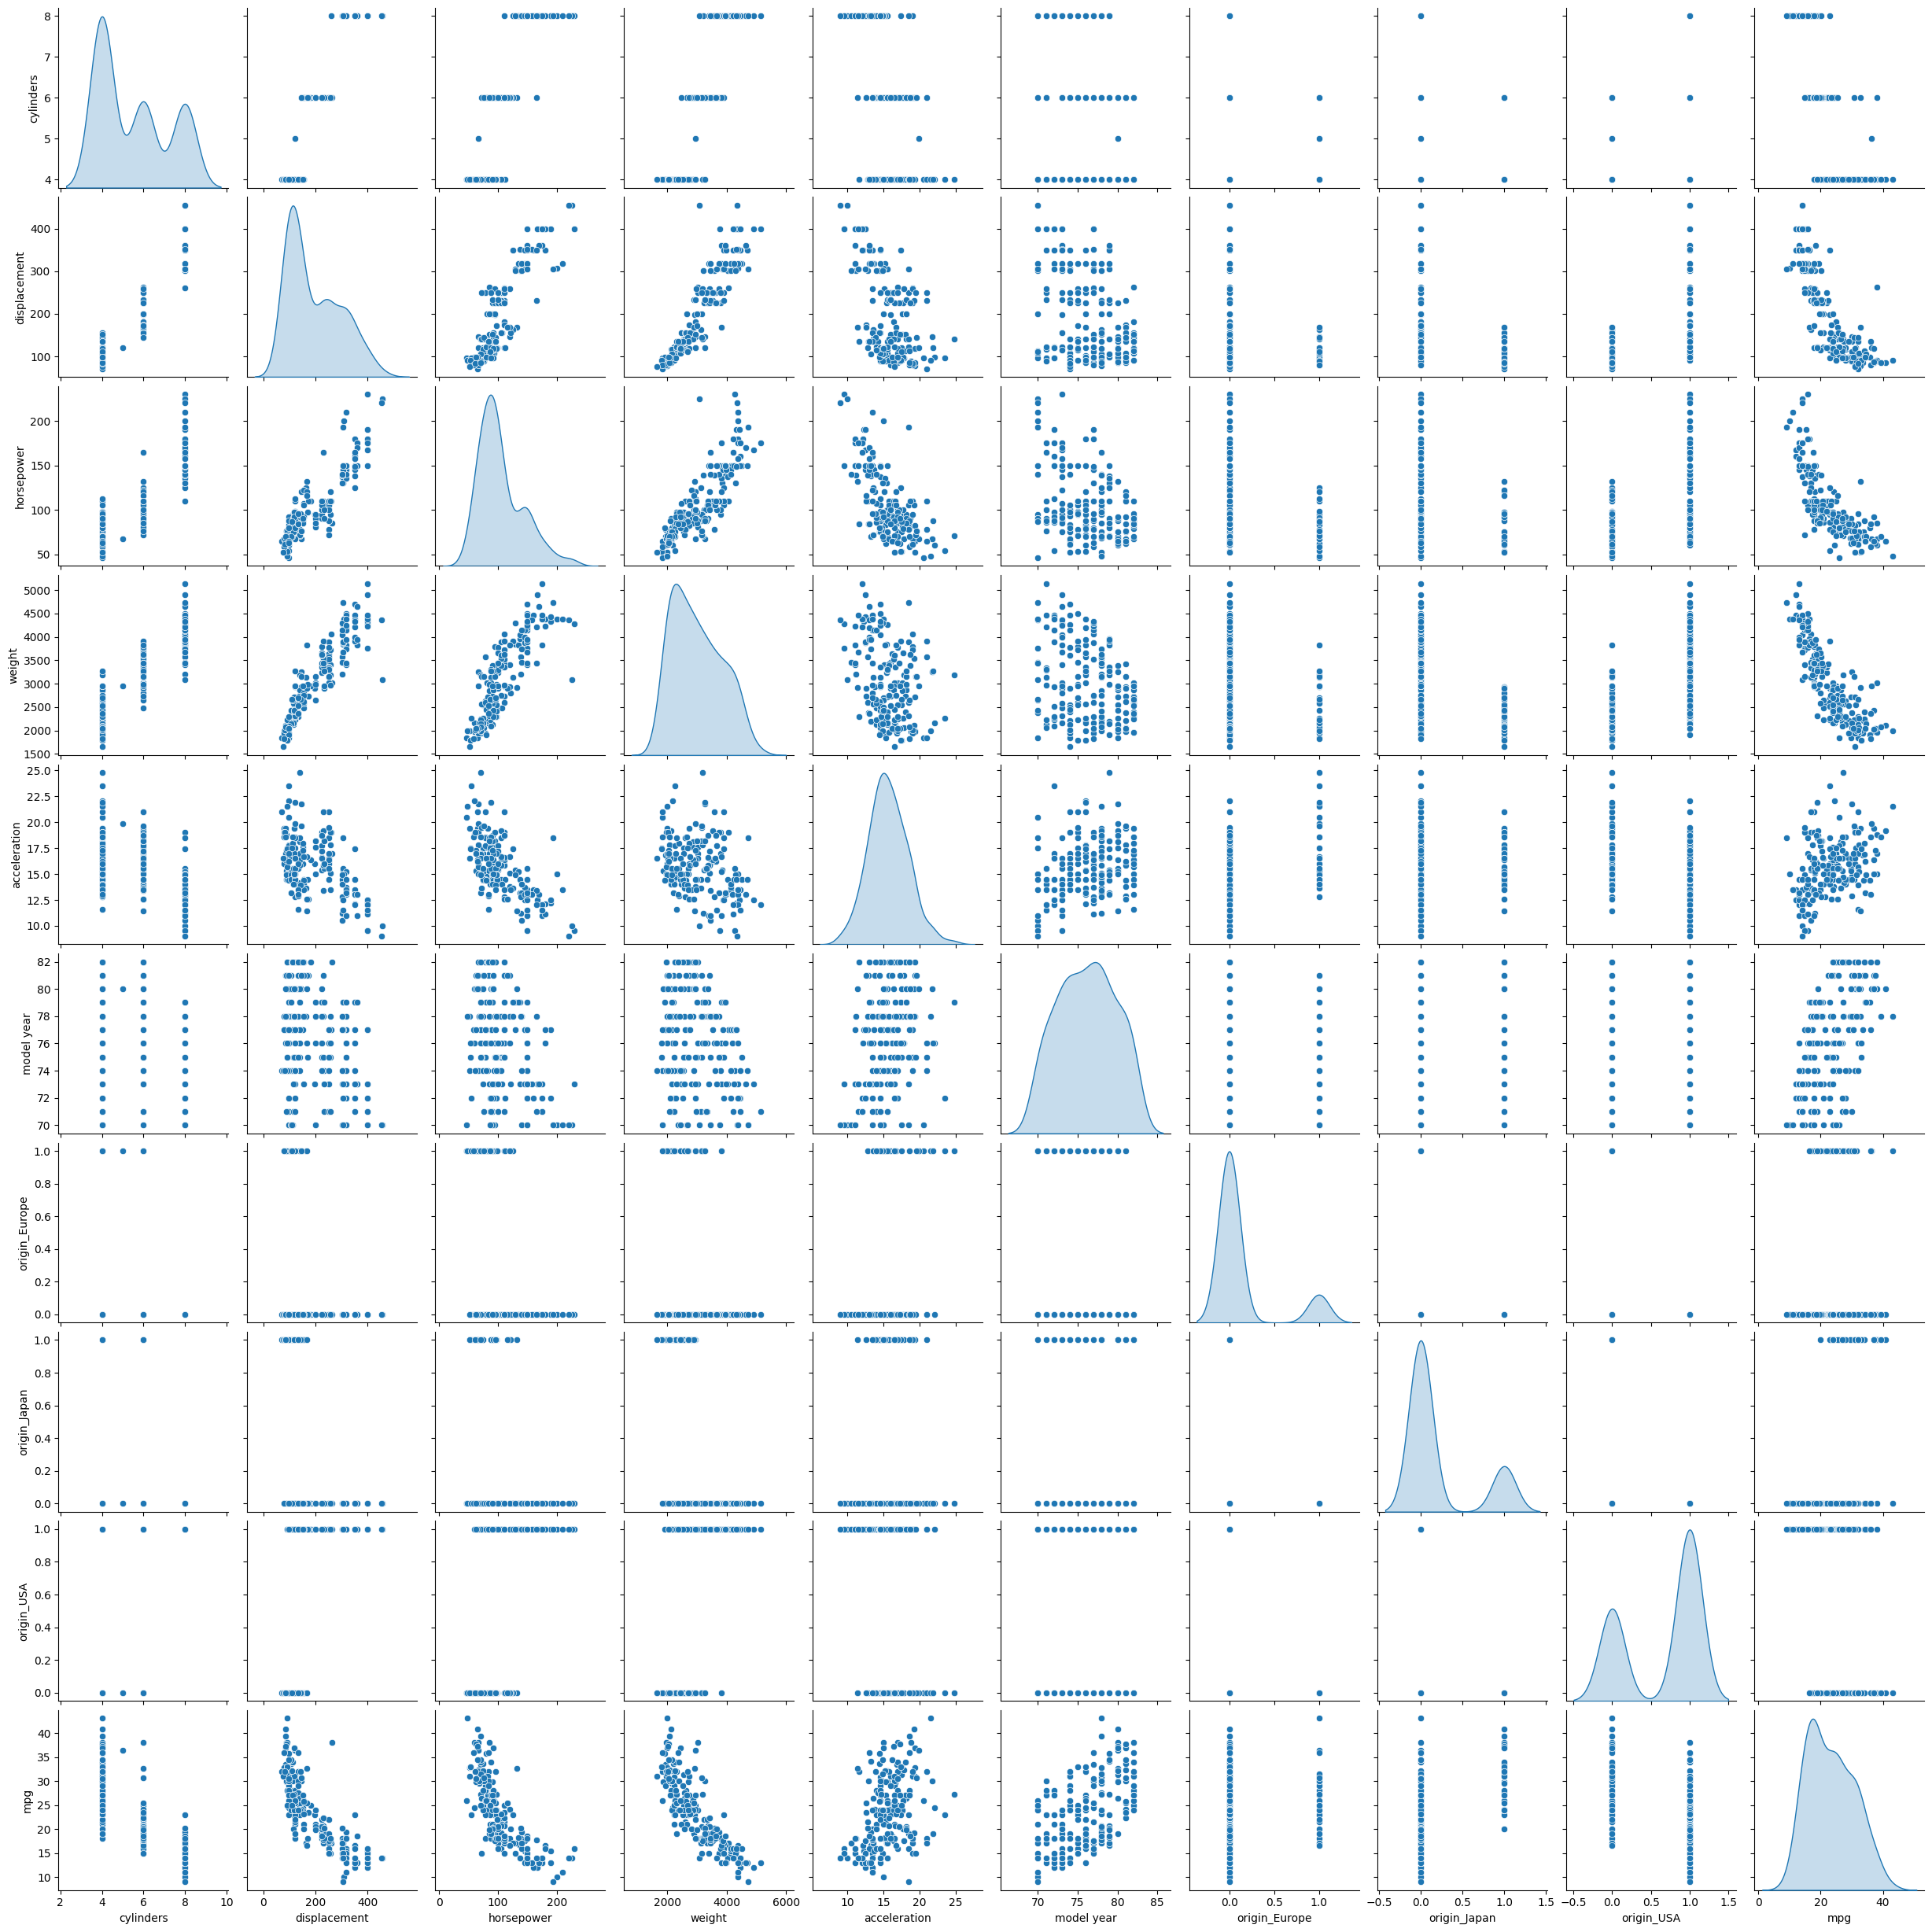

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Como es mucho dato, hacemos una copia reducida (opcional)
sample_train = train_dataset.sample(200, random_state=42)  # si quieres reducir filas para que cargue rápido

# Pairplot
sns.pairplot(sample_train, diag_kind='kde')

plt.show()


### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [17]:
from sklearn.preprocessing import StandardScaler

# Separar features y target
X_train = train_dataset.drop(columns=[target])
y_train = train_dataset[target]
X_test = test_dataset.drop(columns=[target])
y_test = test_dataset[target]

# Inicializar el scaler
scaler = StandardScaler()

# Ajustar en train y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar test usando solo transform
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame si quieres mantener nombres de columnas e índices
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Mostrar forma final
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (313, 9)
X_test_scaled shape: (79, 9)


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [18]:
# Número de features
input_shape = [X_train_scaled.shape[1]]

# Crear modelo secuencial
model = keras.Sequential([
    layers.Dense(18, activation='relu', input_shape=input_shape),
    layers.Dense(18, activation='relu'),
    layers.Dense(1)  # salida de regresión
])

# Compilar modelo
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae', 'mse']
)


c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [19]:
# Mostrar resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [20]:
# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 589.6522 - mae: 23.0092 - mse: 589.6522 - val_loss: 657.9869 - val_mae: 24.4404 - val_mse: 657.9869
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 584.3647 - mae: 22.7479 - mse: 584.3647 - val_loss: 641.8193 - val_mae: 24.1035 - val_mse: 641.8193
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 582.2594 - mae: 22.7154 - mse: 582.2594 - val_loss: 625.9963 - val_mae: 23.7721 - val_mse: 625.9963
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 540.2754 - mae: 21.8588 - mse: 540.2754 - val_loss: 609.6320 - val_mae: 23.4284 - val_mse: 609.6320
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 535.9004 - mae: 21.6509 - mse: 535.9004 - val_loss: 592.5479 - val_mae: 23.0636 - val_mse: 592.5479
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 508.9819 - mae: 21.1668 - mse: 508.9819 - val_loss: 574.2971 - val_mae: 22.6646 - val_mse: 574.2971
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

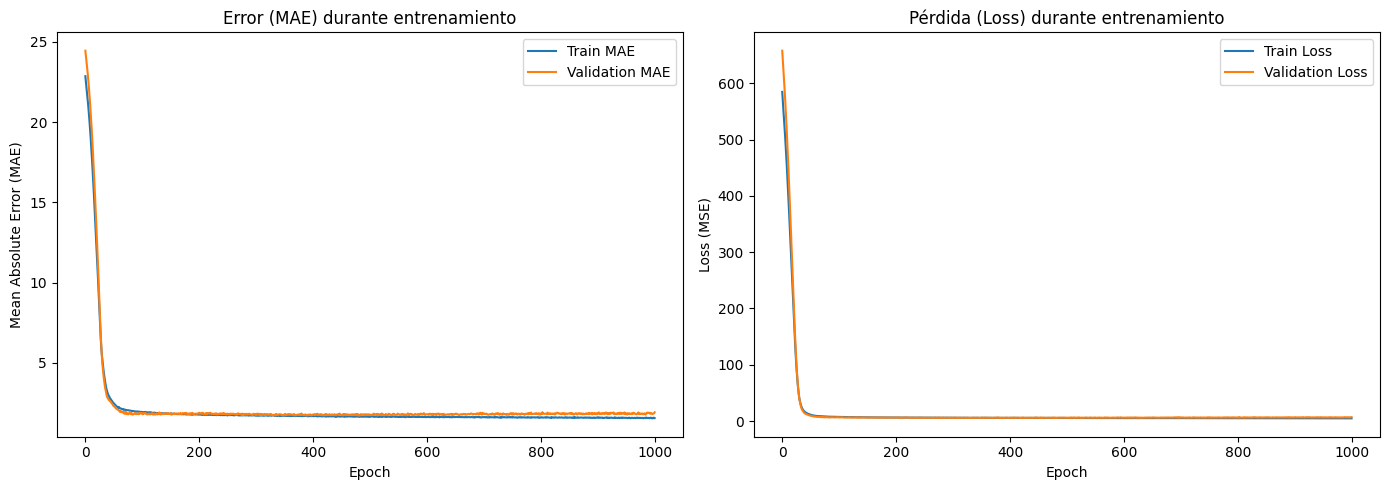

In [21]:
# Convertir history a DataFrame
hist_df = pd.DataFrame(history.history)

# Crear figura
plt.figure(figsize=(14, 5))

# Subplot 1: MAE (error)
plt.subplot(1, 2, 1)
plt.plot(hist_df['mae'], label='Train MAE')
plt.plot(hist_df['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Error (MAE) durante entrenamiento')
plt.legend()

# Subplot 2: Loss (MSE)
plt.subplot(1, 2, 2)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Pérdida (Loss) durante entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

Error (MAE) durante entrenamiento:

El MAE (error medio absoluto) desciende rápidamente en las primeras ~50 épocas, lo que indica que el modelo aprende de manera efectiva al inicio.

A partir de ese punto, tanto el error en entrenamiento como en validación se estabilizan en valores bajos y similares, sin una separación significativa entre ambas curvas.

Esto sugiere que no hay síntomas evidentes de sobreajuste (overfitting), ya que el modelo generaliza bien sobre los datos de validación.

Pérdida (Loss, MSE) durante entrenamiento:

La pérdida (error cuadrático medio, MSE) muestra un comportamiento similar: caída abrupta al inicio y estabilización posterior.

Las curvas de entrenamiento y validación permanecen prácticamente pegadas a lo largo de todas las épocas.

Esto confirma que el modelo mantiene un desempeño equilibrado en ambas particiones, sin aprender solo los datos de entrenamiento.

Conclusión:
El modelo ha aprendido bien la tarea, estabilizándose en un buen nivel de error y pérdida. El número de épocas podría reducirse (posiblemente con 200–300 épocas bastaría) para ahorrar tiempo computacional, y podría implementarse un callback como EarlyStopping para detener el entrenamiento automáticamente cuando no haya mejoras adicionales.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [22]:
# Crear modelo de nuevo
model = keras.Sequential([
    layers.Dense(18, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(18, activation='relu'),
    layers.Dense(1)
])

# Compilar modelo
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [24]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 600.6367 - mae: 23.2437 - mse: 600.6367 - val_loss: 664.8629 - val_mae: 24.5834 - val_mse: 664.8629
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 562.3307 - mae: 22.3264 - mse: 562.3307 - val_loss: 650.2009 - val_mae: 24.2896 - val_mse: 650.2009
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 571.5162 - mae: 22.4691 - mse: 571.5162 - val_loss: 636.4293 - val_mae: 24.0075 - val_mse: 636.4293
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 549.2137 - mae: 22.0215 - mse: 549.2137 - val_loss: 622.0442 - val_mae: 23.7107 - val_mse: 622.0442
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 561.9549 - mae: 22.4121 - mse: 561.9549 - val_loss: 607.2183 - val_mae: 23.3981 - val_mse: 607.2183
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 518.8008 - mae: 21.3310 - mse: 518.8008 - val_loss: 591.2463 - val_mae: 23.0612 - val_mse: 591.2463
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

Interpreta el gráfico

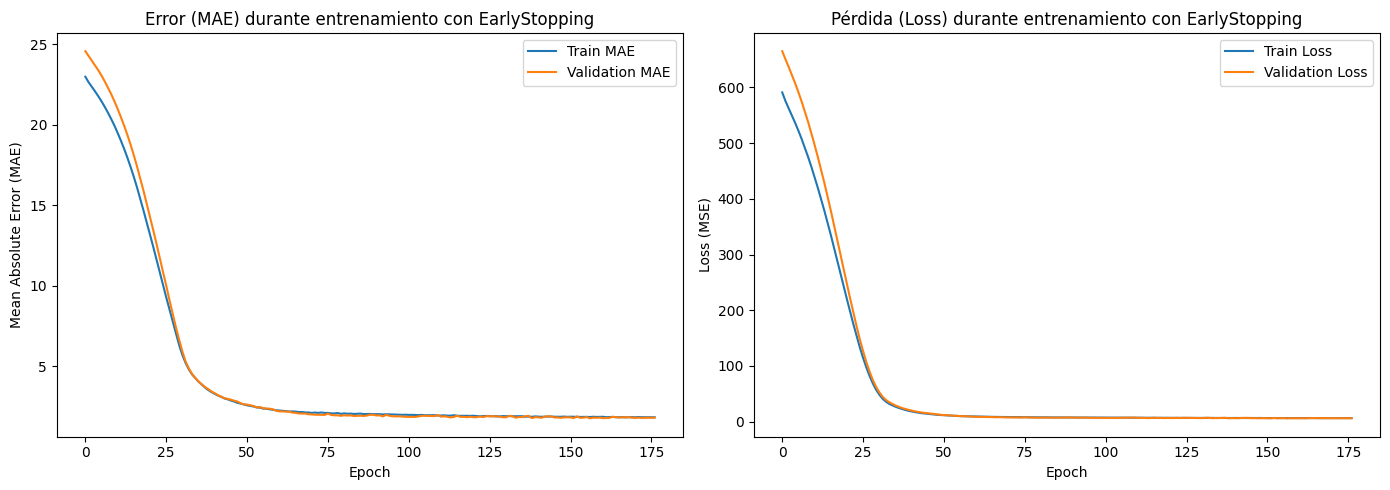

In [25]:
# Convertir history a DataFrame
hist_df = pd.DataFrame(history.history)

# Crear figura
plt.figure(figsize=(14, 5))

# MAE
plt.subplot(1, 2, 1)
plt.plot(hist_df['mae'], label='Train MAE')
plt.plot(hist_df['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Error (MAE) durante entrenamiento con EarlyStopping')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(hist_df['loss'], label='Train Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Pérdida (Loss) durante entrenamiento con EarlyStopping')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# Obtener MAE medio en validación tras estabilización
mae_medio = hist_df['val_mae'][-20:].mean()
print(f"MAE medio (últimas 20 épocas o tras estabilización): {mae_medio:.4f}")

MAE medio (últimas 20 épocas o tras estabilización): 1.8086


### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [27]:
# Evaluar el modelo en el conjunto de test
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=1)

# Mostrar resultados
print(f"Loss (MSE) en test: {loss:.4f}")
print(f"MAE en test: {mae:.4f}")
print(f"MSE en test: {mse:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3447 - mae: 1.8468 - mse: 6.3447 
Loss (MSE) en test: 7.0047
MAE en test: 1.9069
MSE en test: 7.0047


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


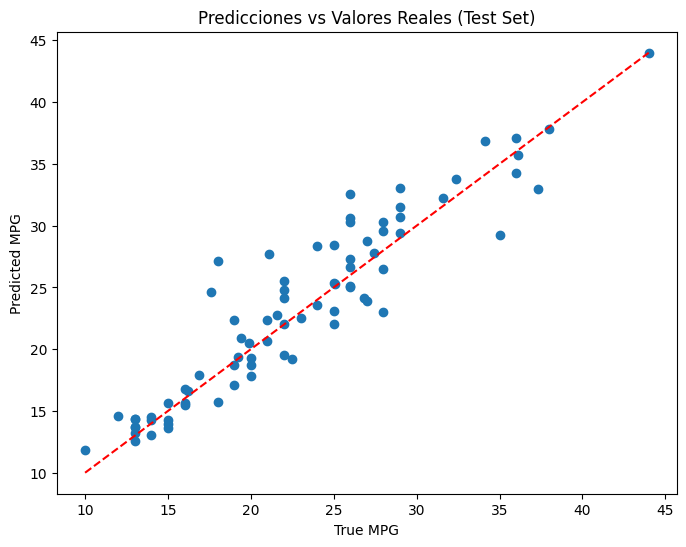

In [28]:
# Obtener predicciones
y_pred = model.predict(X_test_scaled).flatten()

# Dibujar scatter plot: true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('Predicciones vs Valores Reales (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.show()